# Exploratory Data Analysis on text-based Dataframes 

Counts and Lengths: Count of words and sentences, their length and average length
Term Frequency Analysis: Most frequently occuring words and n_gram

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

import os

In [5]:
import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4', quiet=True)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

In [10]:
EFS_DIR = f"/efs/shared_storage/madewithml/anuj018"
dataset = pd.read_csv('.\..\datasets\dataset.csv')
dataset.head()

,id,created_on,title,description,tag
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...,computer-vision
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...,computer-vision
2,9,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla...",other
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...,other
4,25,2020-03-07 23:04:31,AttentionWalk,"A PyTorch Implementation of ""Watch Your Step: ...",other


In [11]:
dataset['tag'].value_counts()

tag
natural-language-processing    310
computer-vision                285
other                          106
mlops                           63
Name: count, dtype: int64

In [16]:


# rating 4, 5 => Positive; 1, 2, 3 => Negative
def interested_tags(tag):
    if tag == 'computer-vision' or tag == 'mlops':
        return "interested"
    else:
        return "Not interested"



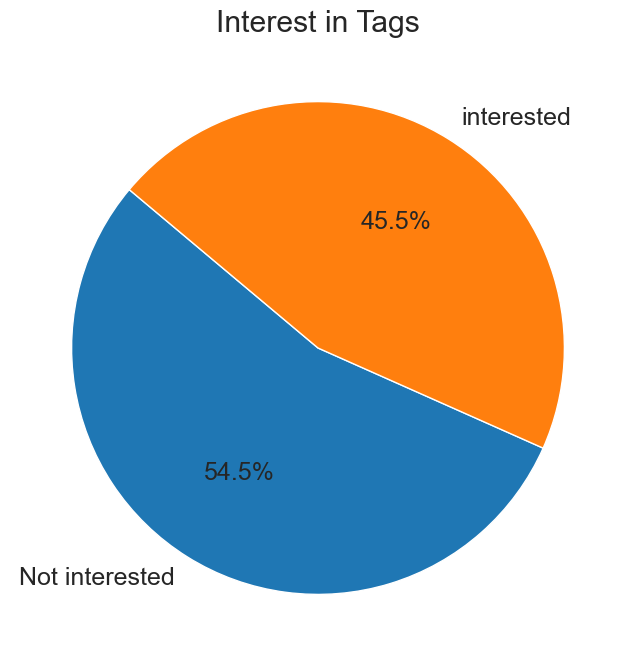

In [17]:
dataset['interest'] = dataset['tag'].apply(interested_tags)

# Create a pie chart
interest_counts = dataset['interest'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(interest_counts, labels=interest_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Interest in Tags')
plt.show()

## Charecter and Word Count

In [22]:
def charecter_len(description):
    print(f'length is {len(description)}')
    return len(description)

def word_count(description):
    print(f'total number of words are {len(description.split())}')
    return len(description.split())

In [23]:
word_count('yoyoyo I will definitely get a ferrari')

total number of words are 7


7

In [24]:
dataset['charecter_length'] = dataset['description'].apply(charecter_len)
dataset['total_number_of_words'] = dataset['description'].apply(word_count)

length is 107
length is 147
length is 114
length is 71
length is 108
length is 116
length is 107
length is 78
length is 114
length is 80
length is 53
length is 160
length is 139
length is 160
length is 76
length is 114
length is 91
length is 114
length is 52
length is 47
length is 53
length is 120
length is 137
length is 18
length is 155
length is 137
length is 110
length is 65
length is 160
length is 65
length is 82
length is 147
length is 73
length is 89
length is 132
length is 134
length is 129
length is 71
length is 137
length is 95
length is 138
length is 77
length is 42
length is 80
length is 56
length is 160
length is 63
length is 133
length is 126
length is 76
length is 159
length is 54
length is 159
length is 105
length is 97
length is 126
length is 124
length is 83
length is 99
length is 126
length is 68
length is 141
length is 125
length is 102
length is 147
length is 144
length is 64
length is 54
length is 112
length is 34
length is 134
length is 43
length is 160
length is 

In [25]:
dataset.head()

,id,created_on,title,description,tag,interest,charecter_length,total_number_of_words
0,6,2020-02-20 06:43:18,Comparison between YOLO and RCNN on real world...,Bringing theory to experiment is cool. We can ...,computer-vision,interested,107,19
1,7,2020-02-20 06:47:21,"Show, Infer & Tell: Contextual Inference for C...",The beauty of the work lies in the way it arch...,computer-vision,interested,147,27
2,9,2020-02-24 16:24:45,Awesome Graph Classification,"A collection of important graph embedding, cla...",other,Not interested,114,13
3,15,2020-02-28 23:55:26,Awesome Monte Carlo Tree Search,A curated list of Monte Carlo tree search pape...,other,Not interested,71,11
4,25,2020-03-07 23:04:31,AttentionWalk,"A PyTorch Implementation of ""Watch Your Step: ...",other,Not interested,108,15


## Word Count Frequency -> Useful for sentiment analysis

Examining the most frequently occuring words is one of the most popular systems of Text analytics. 

### Data Preprocessing to ensure that irrelevant or repeating words dont appear in the Frequency Analysis Process

1) Text Case Normalization
2) StopWords removal (preposition)
3) Punctuation Removal 
4) Lemmetization 

In [37]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anuj9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anuj9\AppData\Roaming\nltk_data...


True

In [53]:
import re # punctuation removal
from nltk.corpus import stopwords #nltk.corpus contains list of stopword
from nltk.stem import WordNetLemmatizer

# def preprocess_description(text):
#     lemmatizer = WordNetLemmatizer() 
#     stop_words = set(stopwords.words('english'))
#     text = text.lower()
#     text = re.sub(r'[^\w\s]', '', text)
#     text = " ".join([word for word in text.split() if word not in stop_words])
#     text = " ".join([lemmatizer.lemmatize(word) for word in text])
#     return text



def clean(review):
    
    review = review.lower()
    review = re.sub('[^a-z A-Z 0-9-]+', '', review)
    review = " ".join([word for word in review.split() if word not in stopwords.words('english')])
    
    return review

def preprocessed_description_list(text):
    text_list = text.split() 
    return text_list

In [54]:
dataset['preprocessed_description'] = dataset['description'].apply(clean)

In [55]:
dataset['preprocessed_description_list'] = dataset['preprocessed_description'].apply(preprocessed_description_list)

In [56]:
corpus = []
for i in trange(dataset.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += dataset['preprocessed_description_list'][i]
len(corpus)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 764/764 [00:00<00:00, 375096.37it/s]


7731

In [57]:


mostCommon = Counter(corpus).most_common(10)
mostCommon



[('learning', 161),
 ('model', 102),
 ('using', 95),
 ('image', 76),
 ('models', 68),
 ('deep', 67),
 ('language', 59),
 ('data', 55),
 ('text', 49),
 ('pytorch', 48)]

In [58]:


words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)



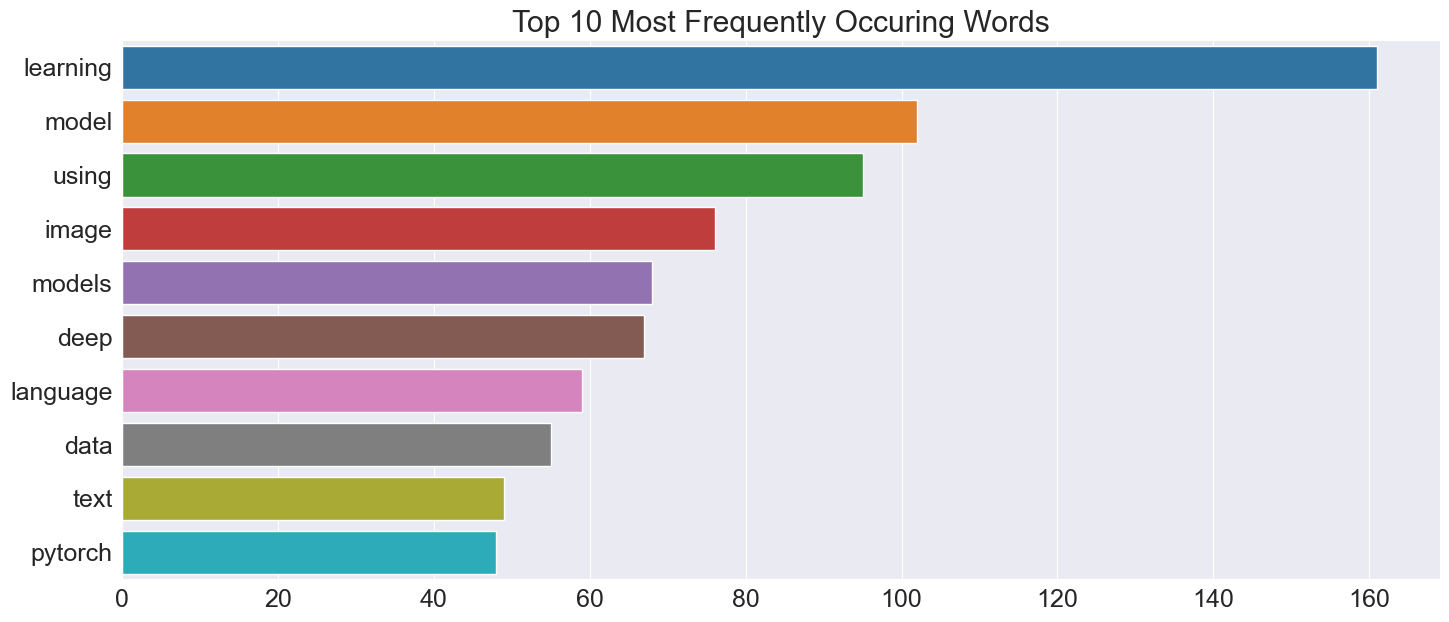

In [59]:


sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

